In [5]:
import geopandas as gpd
import os
import pandas as pd

# Define the path
path = "D:\\GitHub\\GitHub\\data"

# List all SHP files in the path that contain "_RoadLink" in their filename
all_files = [os.path.join(path, file) for file in os.listdir(path) if file.endswith('.shp') and "_RoadLink" in file]

# Read and combine all the shapefiles
gdfs = [gpd.read_file(file) for file in all_files]
combined_gdf = gpd.GeoDataFrame(pd.concat(gdfs, ignore_index=True))

# Ensure the current CRS is set to EPSG:27700
combined_gdf.set_crs(epsg=27700, inplace=True)

# Reproject the combined data to EPSG:4326
combined_gdf = combined_gdf.to_crs(epsg=4326)

# Save the reprojected data as a GeoJSON
output_path = os.path.join(path, "OS_UK.geojson")

combined_gdf[['identifier', 'geometry']].to_file(output_path, driver="GeoJSON")

print(f"Reprojected GeoJSON saved to: {output_path}")


KeyboardInterrupt: 

<Axes: >

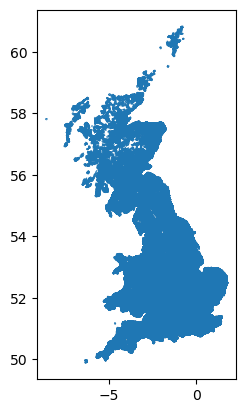

In [15]:
gdf_od = gpd.read_file(path + "\\OS_UK.geojson")
gdf_od.plot()

In [16]:
gdf_large_exmaple = gpd.read_file("https://github.com/nptscot/networkmerge/releases/download/v0.1/large_route_network_example_edingurgh.geojson")

C:\Users\wangz\AppData\Local\Temp\ipykernel_17248\1541737514.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffer_gdf = gdf_large_exmaple.buffer(0.1)


<Axes: >

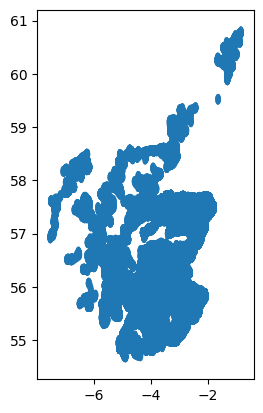

In [18]:
# The value '0.01' is an example; adjust it based on your needs and the coordinate system of your GeoJSON
buffer_gdf = gdf_large_exmaple.buffer(0.1)

buffer_gdf.plot()


In [19]:
# Clip the larger GeoJSON using the buffer
clipped_gdf = gpd.clip(gdf_od, buffer_gdf)

# Save the clipped GeoJSON
clipped_gdf.to_file(path + '\\OS_large_route_network_example_edingurgh.geojson', driver='GeoJSON')

<Axes: >

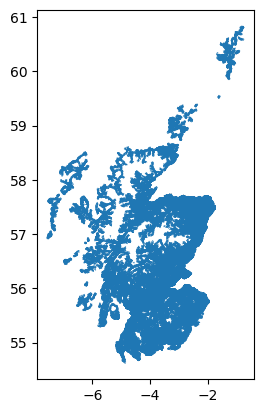

In [20]:
clipped_gdf.plot()